# Лабораторна робота #3
## З дисципліни Інтелектуальний аналіз даних
## Студента групи МІТ-31
## __Єрмакова Юрія__


## Базова ініціалізація

In [301]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection as model_selection
import sklearn.linear_model as linear_model
import sklearn.datasets as datasets
from sklearn import preprocessing, neighbors, metrics


1. Створити набір даних за допомогою DatasetGenerator

In [302]:
COUNT = 721

x, y = datasets.make_classification(n_samples=COUNT, n_features=200, class_sep=0.95, random_state=0)
model_1 = model_selection.train_test_split(x, y, test_size=0.66, random_state=0),

model_2 = pd.DataFrame(data={
    'x': [np.random.uniform(-4.0, 4.0) for _ in range(COUNT)],
    'y': [np.random.uniform(-180.0, 180.0) for _ in range(COUNT)],
    'z': ['90.0' for _ in range(COUNT)]
})

2. Завантажити набір даних для класифікації на сайті (у кожного студента має бути інший - прошу організуватись відповідним чином)

In [303]:
model = pd.read_csv('./Pokemon.csv')
model

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


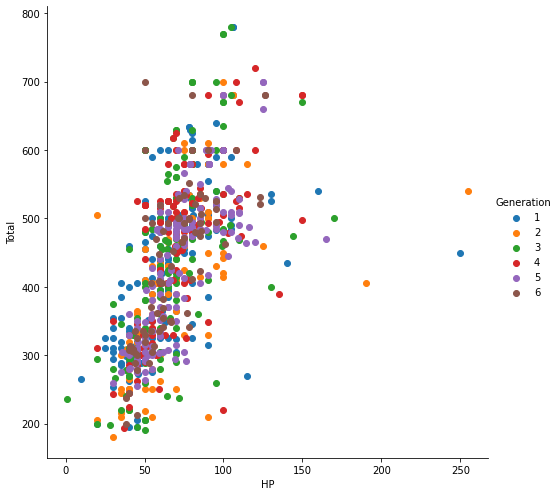

In [304]:
HUE = 'Generation'
# HUE = 'Legendary'

sns.FacetGrid(model, hue=HUE, height=7).map(plt.scatter, 'HP', 'Total').add_legend()

plt.show()

## 1

In [305]:
features = list(model.columns[5:10])          
target = model.columns[4]                      

# feature matrix
x = model.iloc[:,5:10]

# response vector
y = model.iloc[:,4]

print()
print(f'Features: {features}')
print(f'Target: {target}')

print()
print(f'X: {x.shape}')
print(f'Y: {y.shape}')



Features: ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def']
Target: Total

X: (800, 5)
Y: (800,)


In [306]:
encoder = preprocessing.LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

# new col
model['EncodedType'] = y

print(f'Classes: {encoder.classes_}')
print(f'Encoded: {y}')


Classes: [180 190 194 195 198 200 205 210 213 215 218 220 224 236 237 240 244 245
 250 251 253 255 260 262 263 264 265 266 269 270 273 275 278 280 281 285
 288 289 290 292 294 295 299 300 302 303 304 305 306 307 308 309 310 313
 314 315 316 318 319 320 323 325 328 329 330 334 335 336 340 341 345 348
 349 350 351 352 355 358 360 362 363 365 369 370 371 375 380 382 384 385
 390 395 400 401 405 409 410 411 413 414 415 418 420 423 424 425 428 430
 431 435 438 440 442 445 446 448 450 452 454 455 456 458 460 461 462 464
 465 466 467 468 470 471 472 473 474 475 479 480 481 482 483 484 485 487
 488 489 490 494 495 497 498 499 500 505 507 508 509 510 514 515 518 519
 520 521 523 525 528 530 531 534 535 540 545 550 552 555 560 565 567 575
 579 580 590 594 600 610 615 618 625 630 634 635 640 660 670 680 700 720
 770 780]
Encoded: [ 57  94 165 188  51  94 169 190 190  54  94 167 189   3   6  91   3   6
  91 148  19  72 136 180  20  98  23 112  36 110  59 142  43 116  31  81
 153  30  81 153  60 14

## 2

In [307]:

classifier = neighbors.KNeighborsClassifier(n_neighbors=1)
classifier.fit(x, y)

KNeighborsClassifier(n_neighbors=1)

In [308]:
prediction = classifier.predict([[ 62,63,80,80,60 ]])[0]
print(f'Prediction: {prediction}')

classes = model.loc[model['EncodedType'] == 1, 'Total'].values
print(f'Predicted classes: {classes}')

classes = model.loc[model['EncodedType'] == 1, 'Type 1'].values
print(f'Predicted classes: {classes}')

classes = model.loc[model['EncodedType'] == 1, 'Type 2'].values
print(f'Predicted classes: {classes}')

Prediction: 137
Predicted classes: [190]
Predicted classes: ['Normal']
Predicted classes: ['Fairy']


In [309]:
xn = [[ 44,48,65,50,64 ], [ 59,63,80,65,80 ]]
classifier.predict(xn)

classes = neighbors.KNeighborsClassifier(n_neighbors=5)

classes.fit(x, y)

kypred = classes.predict(x)

print(f'Prediction: {classifier.predict(xn)}')

Prediction: [54 94]


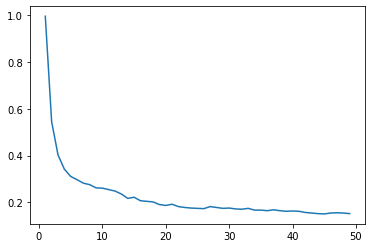

In [310]:
res = []
k_range = list(range(1, 50))
for i in k_range:
    k_classifier = neighbors.KNeighborsClassifier(n_neighbors=i)
    k_classifier.fit(x, y)
    k_prediction = k_classifier.predict(x)
    res.append(metrics.accuracy_score(y, k_prediction))

plt.plot(k_range, res)
plt.show()

## 3

In [311]:
logreg = linear_model.LogisticRegression()
logreg.fit(x, y)

logreg.predict([[ 62,63,80,80,60 ]])
y_pred = logreg.predict(x)

y_pred

D:\Users\Jurii\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([184, 184, 184, 184, 184, 184, 184, 184, 184, 181, 181, 181, 184,
         6,   6, 181, 116,   6,  62,  62, 152, 146,  94, 184, 184, 184,
       152, 184, 184, 184, 184, 184, 158, 157, 146, 146, 152, 152, 184,
       184, 171,  94, 184, 184,  29, 109, 152, 152, 184, 184, 184, 184,
       184, 152, 181, 187, 119, 184, 184, 184, 184, 119, 184, 184, 184,
       184, 146, 152, 138, 138,  92, 162,  55, 152, 152, 150, 184, 184,
        26, 171, 115, 107, 157, 184, 184, 116, 170, 170, 162, 162, 184,
       184, 184,  94,  94, 116, 171, 189, 185,  97, 162, 184, 162,  27,
       171, 171, 115, 148, 181, 181, 170, 170,  89, 152, 119, 119, 146,
       189, 184, 158,  55, 116, 109, 134, 152, 182, 170, 152, 152, 162,
       184, 162, 184,  92, 184, 184, 184, 184, 152,  89, 152, 152, 171,
        94, 152, 171, 184, 119, 181, 162, 182, 189, 184, 152, 184, 171,
       181, 184, 184, 184, 184, 184, 195, 184, 199, 181, 181, 181, 181,
       184, 184, 184, 184, 184, 184, 184, 116, 171, 171, 174, 17

## 4

In [312]:
print(f'kypred accuracy: {metrics.accuracy_score(y, kypred)}')
print(f'y_pred accuracy: {metrics.accuracy_score(y, y_pred)}')

kypred accuracy: 0.31125
y_pred accuracy: 0.075
